In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [3]:
books = pd.read_csv('Dataset/Books.csv')
ratings = pd.read_csv('Dataset/Ratings.csv')
users = pd.read_csv('Dataset/Users.csv')

### Preprocessing Books data

In [4]:
books.shape

(271360, 8)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books.describe(include = 'all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [7]:
books.rename({'Book-Title':'Title',
            'Book-Author':'Author',
            'Year-Of-Publication':'Year_of_publication',
            'Image-URL-S':'Image_URL_S',
            'Image-URL-M':'Image_URL_M',
            'Image-URL-L':'Image_URL_L'},inplace=True,axis=1)


In [8]:
books.head()

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
books[books.duplicated()].any()

ISBN                   False
Title                  False
Author                 False
Year_of_publication    False
Publisher              False
Image_URL_S            False
Image_URL_M            False
Image_URL_L            False
dtype: bool

In [10]:
books.drop(['Image_URL_S','Image_URL_L'],axis=1,inplace=True)
books.head()

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [11]:
books.isnull().any()

ISBN                   False
Title                  False
Author                  True
Year_of_publication    False
Publisher               True
Image_URL_M            False
dtype: bool

In [12]:
books.isnull().sum()

ISBN                   0
Title                  0
Author                 1
Year_of_publication    0
Publisher              2
Image_URL_M            0
dtype: int64

In [13]:
books.loc[books['Author'].isnull()]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [14]:
books.loc[books['Publisher'].isnull()]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [15]:
books.at[187689,'Author'] = 'Larissa Downes'

In [16]:
books.at[128890,'Publisher'] = 'Other'
books.at[129037,'Publisher'] = 'Other'

In [17]:
books = books.dropna()

In [18]:
books.Year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [19]:
books.loc[books['Year_of_publication'] == 'Gallimard']

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [20]:
books.loc[books['ISBN'] == '2070426769','Title'] = 'Peuple du ciel, suivi de Les Bergers'
books.loc[books['ISBN'] == '2070426769','Author'] = 'Jean-Marie Gustave Le Clezio'
books.loc[books['ISBN'] == '2070426769','Year_of_publication'] = 2003
books.loc[books['ISBN'] == '2070426769','Publisher'] = 'Gallimard'

In [21]:
display(books.iloc[220731])

ISBN                                                          2070426769
Title                               Peuple du ciel, suivi de Les Bergers
Author                                      Jean-Marie Gustave Le Clezio
Year_of_publication                                                 2003
Publisher                                                      Gallimard
Image_URL_M            http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

In [22]:
books.loc[books['Year_of_publication'] == 'DK Publishing Inc']

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [23]:
books.loc[books['ISBN'] == '078946697X','Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books['ISBN'] == '078946697X', 'Author'] = 'Michael Teitelbaum'
books.loc[books['ISBN'] == '078946697X', 'Year_of_publication'] = 2000
books.loc[books['ISBN'] == '078946697X', 'Publisher'] = 'DK Publishing Inc'

books.loc[books['ISBN'] == '0789466953', 'Title'] = 'Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books['ISBN'] == '0789466953', 'Author'] = 'James Buckley'
books.loc[books['ISBN'] == '0789466953','Year_of_publication'] = 2000
books.loc[books['ISBN'] == '0789466953','Publisher'] = 'DK Publishing Inc'

In [24]:
books.Year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [25]:
# COnverting age column into integers
books['Year_of_publication'] = books.Year_of_publication.astype('int')

In [26]:
print(sorted(books.Year_of_publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [27]:
mode = books.Year_of_publication.mode()
mode

0    2002
dtype: int32

In [28]:
# Replacing year greater than 2022 with mode
books.loc[books['Year_of_publication'] > 2022,'Year_of_publication'] = 2002
books.loc[books['Year_of_publication'] ==0 ,'Year_of_publication'] = 2002     #Replacing year 0 with mode

In [29]:
print(sorted(books.Year_of_publication.unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


### Pre-processing Ratings Dataset

In [30]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [31]:
ratings.shape

(1149780, 3)

In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [33]:
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [34]:
ratings.rename({'User-ID':'User_Id',
               'Book-Rating':'Book_Rating'},axis=1,inplace=True)
ratings.head()

,User_Id,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
#duplicated records
ratings[ratings.duplicated()]

,User_Id,ISBN,Book_Rating


In [36]:
ratings_explicit = ratings.loc[ratings['Book_Rating'] != 0]
ratings_explicit.head()

,User_Id,ISBN,Book_Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


### Pre-processing Users Dataset

In [37]:
users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [38]:
users.shape

(278858, 3)

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [40]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [41]:
users[users.duplicated()]

,User-ID,Location,Age


In [42]:
users.rename({'User-ID':'User_Id'}, axis=1, inplace= True)
users.head()

,User_Id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [44]:
# Age less than 10 and greater than 80 doesn't makes any sense. Therefore these extreme points will replace by mean.

cleaned_age = users[users['Age'] >= 10]
cleaned_age = cleaned_age[cleaned_age['Age'] <= 100]
print(sorted(cleaned_age.Age.unique()))

mean = np.round(cleaned_age.Age.mean())
print('mean = ',mean)

users.loc[users['Age'] < 10, 'Age'] = mean
users.loc[users['Age'] > 80, 'Age'] = mean
print(sorted(users.Age.unique()))

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
mean =  35.0
[nan, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]


In [45]:
users.isnull().sum()

User_Id          0
Location         0
Age         110762
dtype: int64

In [46]:
print('Percentage of null values in the data : ',np.round(110762/278858*100))

Percentage of null values in the data :  40.0


In [47]:
users = users.dropna(how='any')      #Droping the null values since 40% of dataset contains null values.
users.Age.unique()

array([18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20., 34.,
       23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42., 50.,
       39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59., 48.,
       72., 56., 67., 80., 52., 69., 71., 73., 78., 64., 12., 74., 75.,
       76., 68., 11., 77., 70., 10.])

In [48]:
users[["City","State","Country"]]=users['Location'].str.split(', ',n=2, expand=True)

In [49]:
users = users.drop('Location',axis=1)

In [50]:
users.head()

,User_Id,Age,City,State,Country
1,2,18.0,stockton,california,usa
3,4,17.0,porto,v.n.gaia,portugal
5,6,61.0,santa monica,california,usa
9,10,26.0,albacete,wisconsin,spain
10,11,14.0,melbourne,victoria,australia


In [51]:
users.Country.isna().sum()

1999

In [52]:
users.dropna(inplace=True)
users.reset_index(drop=True)

,User_Id,Age,City,State,Country
0,2,18.0,stockton,california,usa
1,4,17.0,porto,v.n.gaia,portugal
2,6,61.0,santa monica,california,usa
3,10,26.0,albacete,wisconsin,spain
4,11,14.0,melbourne,victoria,australia
...,...,...,...,...,...
166092,278849,23.0,georgetown,ontario,canada
166093,278851,33.0,dallas,texas,usa
166094,278852,32.0,brisbane,queensland,australia
166095,278853,17.0,stranraer,n/a,united kingdom


In [53]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166097 entries, 1 to 278854
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User_Id  166097 non-null  int64  
 1   Age      166097 non-null  float64
 2   City     166097 non-null  object 
 3   State    166097 non-null  object 
 4   Country  166097 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.6+ MB


### Merging Datasets

In [54]:
data_1 = pd.merge(books,ratings,on='ISBN',how='inner')
data = pd.merge(data_1,users,on='User_Id',how='inner')
data.head(10)

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,49.0,ottawa,ontario,canada
2,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,49.0,ottawa,ontario,canada
3,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,49.0,ottawa,ontario,canada
4,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,11400,0,49.0,ottawa,ontario,canada
5,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,7,49.0,ottawa,ontario,canada
6,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,11400,0,49.0,ottawa,ontario,canada
7,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",http://images.amazon.com/images/P/0316789089.0...,11400,7,49.0,ottawa,ontario,canada
8,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell,http://images.amazon.com/images/P/0440211727.0...,11400,0,49.0,ottawa,ontario,canada
9,0553582658,Summer Light,Luanne Rice,2002,Bantam Books,http://images.amazon.com/images/P/0553582658.0...,11400,0,49.0,ottawa,ontario,canada


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742666 entries, 0 to 742665
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 742666 non-null  object 
 1   Title                742666 non-null  object 
 2   Author               742666 non-null  object 
 3   Year_of_publication  742666 non-null  int32  
 4   Publisher            742666 non-null  object 
 5   Image_URL_M          742666 non-null  object 
 6   User_Id              742666 non-null  int64  
 7   Book_Rating          742666 non-null  int64  
 8   Age                  742666 non-null  float64
 9   City                 742666 non-null  object 
 10  State                742666 non-null  object 
 11  Country              742666 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 70.8+ MB


In [56]:
data.shape

(742666, 12)

### Dividing the dataset into Implicit and Explicit dataset

In [57]:
data_implicit = data[data['Book_Rating'] == 0]
data_implicit = data_implicit.reset_index(drop=True)
data_implicit.head()

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,49.0,ottawa,ontario,canada
2,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,11400,0,49.0,ottawa,ontario,canada
3,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,11400,0,49.0,ottawa,ontario,canada
4,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell,http://images.amazon.com/images/P/0440211727.0...,11400,0,49.0,ottawa,ontario,canada


In [58]:
data_implicit.shape

(477850, 12)

In [59]:
data_explicit = data[data['Book_Rating'] != 0]
data_explicit = data_explicit.reset_index(drop=True)
data_explicit.head()

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country
0,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,49.0,ottawa,ontario,canada
1,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,49.0,ottawa,ontario,canada
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,7,49.0,ottawa,ontario,canada
3,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",http://images.amazon.com/images/P/0316789089.0...,11400,7,49.0,ottawa,ontario,canada
4,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,11400,8,49.0,ottawa,ontario,canada


### Data Visualization

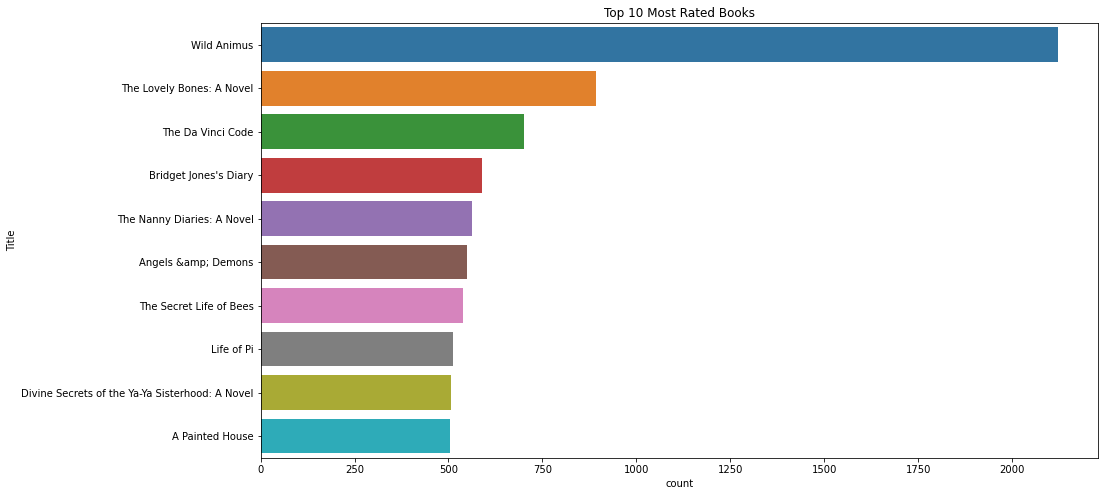

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(y= 'Title',data=data,order=data['Title'].value_counts().index[0:10])
plt.title('Top 10 Most Rated Books')
plt.show()

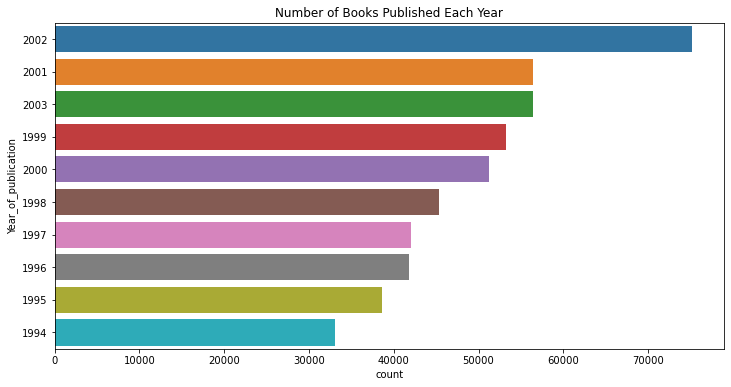

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(y= 'Year_of_publication',data=data,order=data['Year_of_publication'].value_counts().index[0:10])
plt.title('Number of Books Published Each Year')
plt.show()

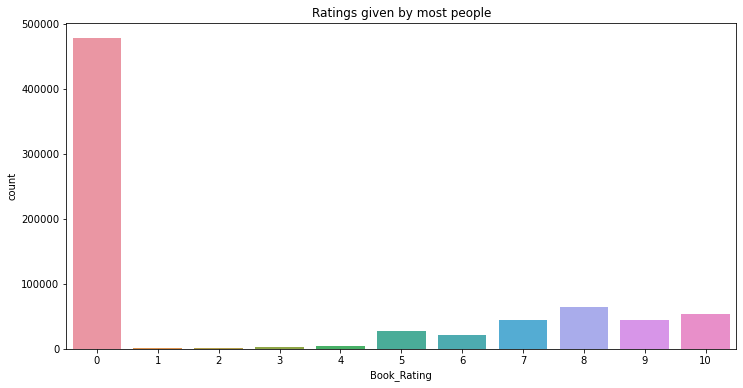

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='Book_Rating',data=data)
plt.title('Ratings given by most people')
plt.show()

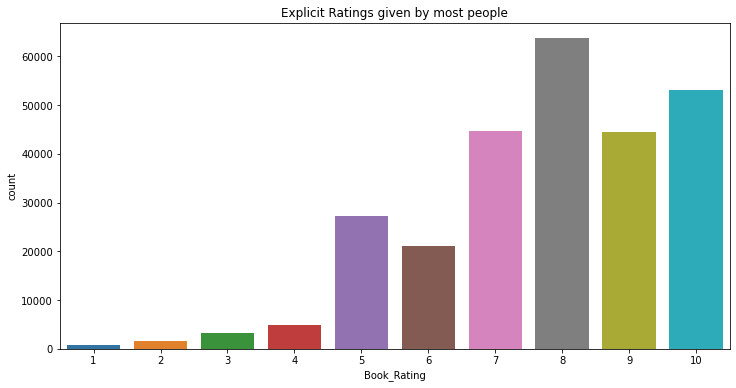

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='Book_Rating',data=data_explicit)
plt.title('Explicit Ratings given by most people')
plt.show()

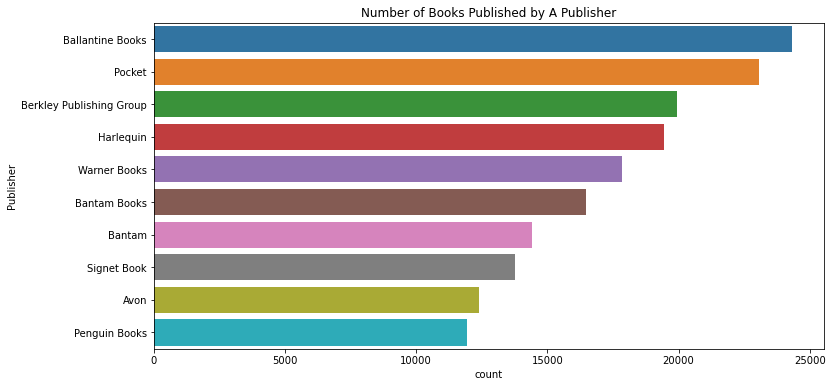

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(y='Publisher',data=data,order=data['Publisher'].value_counts().index[0:10])
plt.title('Number of Books Published by A Publisher')
plt.show()

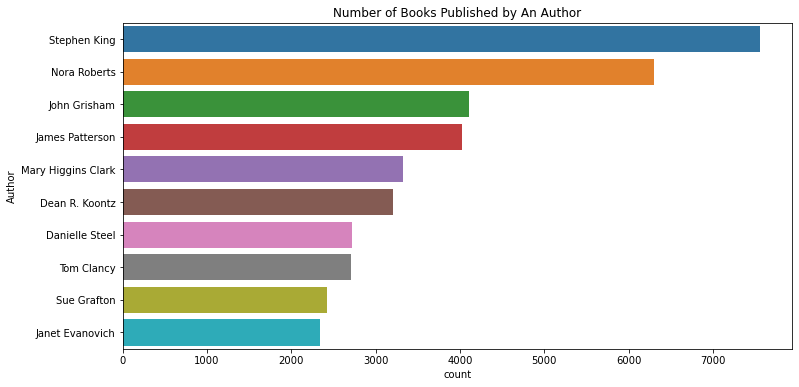

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(y='Author',data=data,order=data['Author'].value_counts().index[0:10])
plt.title('Number of Books Published by An Author')
plt.show()

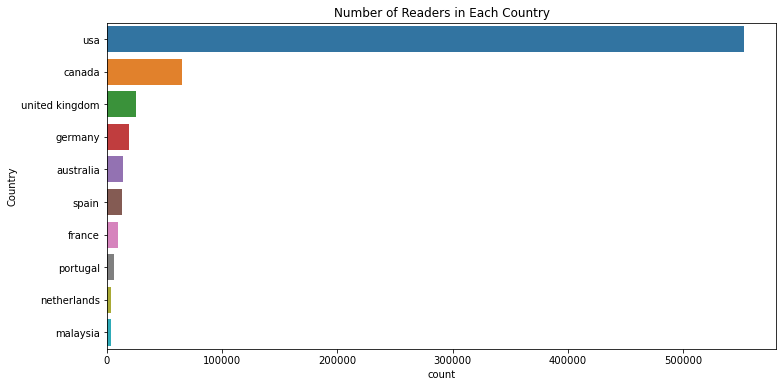

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(y='Country',data=data,order=data['Country'].value_counts().index[0:10])
plt.title('Number of Readers in Each Country')
plt.show()

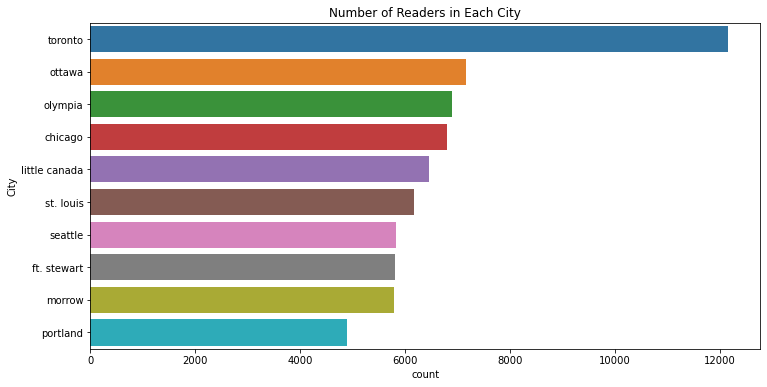

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(y='City',data=data,order=data['City'].value_counts().index[0:10])
plt.title('Number of Readers in Each City')
plt.show()

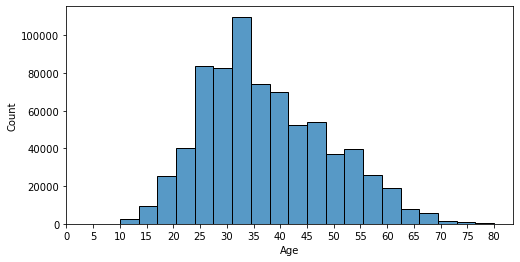

In [68]:
plt.figure(figsize=(8,4))
sns.histplot(x='Age',data=data,bins=20)
plt.xticks(np.arange(0, 85, 5)) 
plt.show()

In [69]:
data_age = data[data['Age'] == 33.0]
data_age

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country
13616,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,52614,8,33.0,toccoa,ga.,usa
13617,0312995423,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press,http://images.amazon.com/images/P/0312995423.0...,52614,0,33.0,toccoa,ga.,usa
13618,0373245580,Marry Me ... Again Montana Mavericks (Silhou...,Cheryl St. John,2003,Silhouette,http://images.amazon.com/images/P/0373245580.0...,52614,0,33.0,toccoa,ga.,usa
13619,0821772953,The Morning After,Lisa Jackson,2004,Zebra Books,http://images.amazon.com/images/P/0821772953.0...,52614,0,33.0,toccoa,ga.,usa
13620,0440120470,The Dinner Party,Howard Fast,1991,Dell Publishing Company,http://images.amazon.com/images/P/0440120470.0...,52614,0,33.0,toccoa,ga.,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
742587,0312022859,Some Soul to Keep,J. California Cooper,1988,St Martins Pr,http://images.amazon.com/images/P/0312022859.0...,234393,9,33.0,rochester,new york,usa
742603,0563487712,Book of the Future,Phil Taylor,2003,BBC Books,http://images.amazon.com/images/P/0563487712.0...,235997,7,33.0,london,england,united kingdom
742610,351811011X,Erkenntnis fÃ¼r freie Menschen (Edition Suhrkamp),Paul K Feyerabend,1980,Suhrkamp,http://images.amazon.com/images/P/351811011X.0...,236733,0,33.0,berlin,berlin,germany
742640,1891408208,Daughter of a Rogue,Stephanie Lynn Hilpert,2001,green bean press,http://images.amazon.com/images/P/1891408208.0...,241969,0,33.0,rancho mirage,california,usa


<AxesSubplot:xlabel='Age', ylabel='count'>

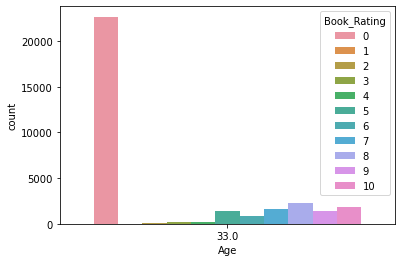

In [70]:
sns.countplot(x='Age',hue='Book_Rating',data=data_age)

<AxesSubplot:xlabel='Age', ylabel='Book_Rating'>

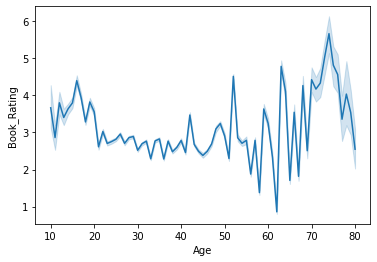

In [71]:
sns.lineplot('Age','Book_Rating',data=data)

In [72]:
data.Country.unique()

array(['usa', 'canada', 'malaysia', 'finland', 'united kingdom',
       'netherlands', 'portugal', 'brazil', 'germany', 'austria',
       'australia', 'france', 'costa rica', 'poland', 'idaho, usa',
       'iran', 'spain', 'indonesia', 'india', 'pakistan', 'taiwan',
       'singapore', 'argentina', 'italy', 'romania', 'greece',
       'england, united kingdom', 'ireland', 'new zealand', 'philippines',
       'belgium', 'philippines"', 'mexico', 'south africa',
       'burkina faso', 'ile de france, france', 'croatia', 'denmark',
       'yugoslavia', 'turkey', 'switzerland', 'china', 'japan',
       'illinois, usa', 'qatar', 'latvia', 'sweden', 'kuwait', 'nepal',
       'peru', 'venezuela', 'hong kong', 'cambridgeshire, united kingdom',
       'slovakia', 'norway', 'dominican republic',
       'bosnia and herzegovina', 'south korea', 'macedonia', 'kenya',
       'mauritius', 'catalonia',
       'yu-song, guam-dong, 626-1, 302, south korea', 'n/a, nigeria',
       'madagascar', 'israel',

In [73]:
data.Country.isnull().sum()

0

In [74]:
# Categorizing age column
def agegroup(x):
    if x <= 14:
        return 'Children'
    if (x>14 and x <= 24):
        return 'Youth'
    if (x>24 and x <=64):
        return 'Adult'
    if x > 64:
        return 'Senior'

In [75]:
data_age = data_explicit
data_age['Age_category'] = data_explicit['Age'].apply(agegroup)

In [76]:
data_age

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Age_category
0,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,49.0,ottawa,ontario,canada,Adult
1,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,49.0,ottawa,ontario,canada,Adult
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,7,49.0,ottawa,ontario,canada,Adult
3,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",http://images.amazon.com/images/P/0316789089.0...,11400,7,49.0,ottawa,ontario,canada,Adult
4,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,11400,8,49.0,ottawa,ontario,canada,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264811,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,http://images.amazon.com/images/P/8441407487.0...,246590,6,20.0,madrid,madrid,spain,Youth
264812,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,19.0,venice,florida,usa,Youth
264813,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,39.0,tioga,pennsylvania,usa,Adult
264814,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,259614,10,22.0,madrid,madrid,spain,Youth


In [77]:
data_age.Age_category.unique()

array(['Adult', 'Senior', 'Youth', 'Children'], dtype=object)

<Figure size 576x720 with 0 Axes>

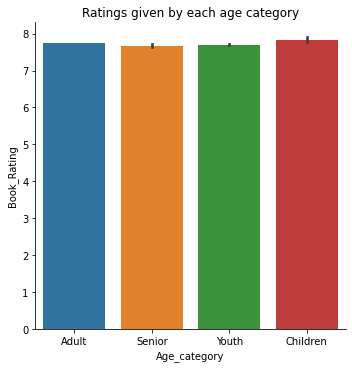

In [78]:
plt.figure(figsize=(8,10))
sns.catplot(x='Age_category',y = 'Book_Rating',data = data_age,kind='bar')
plt.title('Ratings given by each age category')
plt.show()

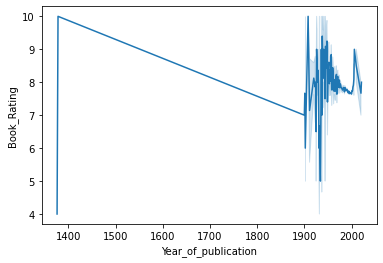

In [79]:
sns.lineplot(x='Year_of_publication', y='Book_Rating',data= data_explicit)
plt.show()

In [80]:
# Taking top 5 countries with most number of readers as data_country
data_country=data_explicit.loc[data_explicit['Country'].isin(['usa','canada','united kingdom','germany','australia'])]
data_country

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Age_category
0,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,49.0,ottawa,ontario,canada,Adult
1,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,49.0,ottawa,ontario,canada,Adult
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,7,49.0,ottawa,ontario,canada,Adult
3,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",http://images.amazon.com/images/P/0316789089.0...,11400,7,49.0,ottawa,ontario,canada,Adult
4,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,11400,8,49.0,ottawa,ontario,canada,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264807,0413589307,Up for None and Coming Apart (New Theatrescripts),Barrie Keeffe,1986,Greenwood Pub Group,http://images.amazon.com/images/P/0413589307.0...,245241,8,17.0,london,n/a,united kingdom,Youth
264809,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,245444,8,18.0,linclon,nebraska,usa,Youth
264812,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,19.0,venice,florida,usa,Youth
264813,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,39.0,tioga,pennsylvania,usa,Adult


In [81]:
data_country.Country.unique()

array(['canada', 'usa', 'united kingdom', 'germany', 'australia'],
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

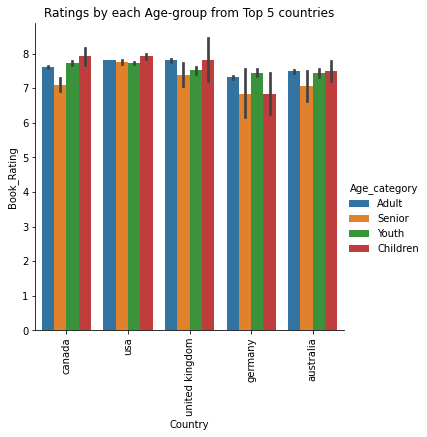

In [82]:
plt.figure(figsize=(15,15))
sns.catplot(x = 'Country',y = 'Book_Rating',data=data_country,kind='bar',hue='Age_category')
plt.title('Ratings by each Age-group from Top 5 countries')
plt.xticks(rotation = 90)
plt.show()

In [83]:
# Book read by most people in USA

In [84]:
data_usa = data_explicit.loc[data_explicit['Country'] == 'usa']
data_usa.head()

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Age_category
801,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,2954,8,71.0,wichita,kansas,usa,Senior
802,0440235502,October Sky: A Memoir,Homer Hickam,1999,Dell,http://images.amazon.com/images/P/0440235502.0...,2954,10,71.0,wichita,kansas,usa,Senior
803,0380973499,War's End: An Eyewitness Account of America's ...,Charles W. Sweeney,1997,William Morrow &amp; Company,http://images.amazon.com/images/P/0380973499.0...,2954,7,71.0,wichita,kansas,usa,Senior
804,031224116X,Murder on the Mauretania (George Porter Dillma...,Conrad Allen,2000,St. Martin's Minotaur,http://images.amazon.com/images/P/031224116X.0...,2954,8,71.0,wichita,kansas,usa,Senior
805,0385319622,"American Chica: Two Worlds, One Childhood",Marie Arana,2001,Dial Press,http://images.amazon.com/images/P/0385319622.0...,2954,9,71.0,wichita,kansas,usa,Senior


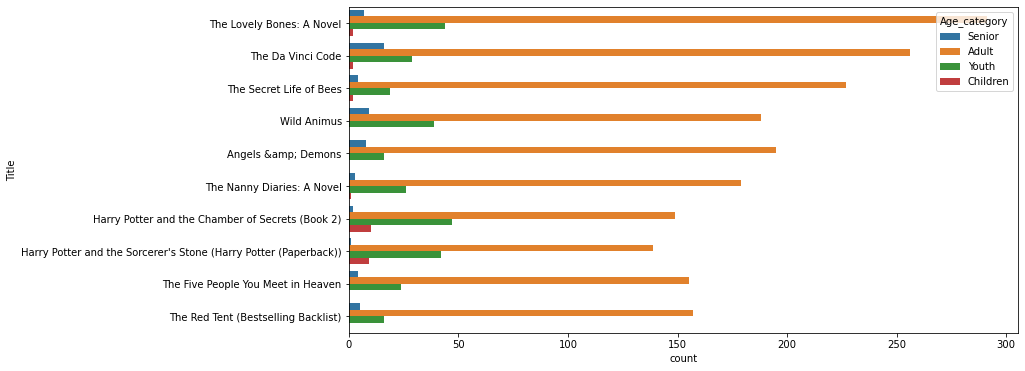

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(y='Title',data=data_usa,order=data_usa['Title'].value_counts().index[0:10],hue='Age_category')
plt.title('')
plt.show()

# Model Building

## 1. Popularity Based

In [86]:
popularity_data = ratings_explicit
popularity_data['Avg_rating'] = popularity_data.groupby('ISBN')['Book_Rating'].transform('mean')
popularity_data['No_of_users_rated'] = popularity_data.groupby('ISBN')['Book_Rating'].transform('count')
popular = popularity_data.sort_values(by=['No_of_users_rated'],ascending=False)
popular


,User_Id,ISBN,Book_Rating,Avg_rating,No_of_users_rated
122939,28269,0316666343,8,8.18529,707
786352,190123,0316666343,10,8.18529,707
744822,180042,0316666343,8,8.18529,707
942614,228477,0316666343,9,8.18529,707
281655,66989,0316666343,8,8.18529,707
...,...,...,...,...,...
559109,134837,9810400470,7,7.00000,1
559110,134837,9812047883,7,7.00000,1
559112,134837,9813002689,9,9.00000,1
559119,134837,9839995006,5,5.00000,1


In [87]:
top = popular[popular['Avg_rating'] >= 8]        # Selecting books with average rating atleast 8
top_recomm = top[top['No_of_users_rated'] >= 200]  # Selecting books which is rated by atleast 200 readers
top_recomm

,User_Id,ISBN,Book_Rating,Avg_rating,No_of_users_rated
122939,28269,0316666343,8,8.18529,707
786352,190123,0316666343,10,8.18529,707
744822,180042,0316666343,8,8.18529,707
942614,228477,0316666343,9,8.18529,707
281655,66989,0316666343,8,8.18529,707
...,...,...,...,...,...
638478,153797,0385484518,8,8.61500,200
465652,111133,0385484518,10,8.61500,200
415970,98787,0385484518,8,8.61500,200
876158,212260,0385484518,10,8.61500,200


In [88]:
top_recomm_df = top_recomm.drop_duplicates('ISBN',keep='first')
top_recomm_df

,User_Id,ISBN,Book_Rating,Avg_rating,No_of_users_rated
122939,28269,0316666343,8,8.185290,707
508719,123827,0385504209,8,8.435318,487
673771,163876,0312195516,6,8.182768,383
597006,144038,0679781587,9,8.408408,333
699667,170513,059035342X,10,8.939297,313
863353,208751,0142001740,6,8.452769,307
869415,210406,0446672211,7,8.142373,295
164337,36326,0671027360,6,8.100372,269
433111,103190,0786868716,3,8.016529,242
1062586,253871,0743418174,10,8.046610,236


In [89]:
pop_recomm = pd.merge(top_recomm_df,books,how='inner')
pop_recomm

,User_Id,ISBN,Book_Rating,Avg_rating,No_of_users_rated,Title,Author,Year_of_publication,Publisher,Image_URL_M
0,28269,0316666343,8,8.185290,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,123827,0385504209,8,8.435318,487,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
2,163876,0312195516,6,8.182768,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
3,170513,059035342X,10,8.939297,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
4,208751,0142001740,6,8.452769,307,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
5,210406,0446672211,7,8.142373,295,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...
6,36326,0671027360,6,8.100372,269,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...
7,103190,0786868716,3,8.016529,242,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...
8,253871,0743418174,10,8.046610,236,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...
9,117852,0156027321,7,8.030973,226,Life of Pi,Yann Martel,2003,Harvest Books,http://images.amazon.com/images/P/0156027321.0...


In [90]:
# Top 5 books that are most popular and received good ratings.
pop_recomm_5 = pop_recomm.head(5)
pop_recomm_5

,User_Id,ISBN,Book_Rating,Avg_rating,No_of_users_rated,Title,Author,Year_of_publication,Publisher,Image_URL_M
0,28269,0316666343,8,8.185290,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,123827,0385504209,8,8.435318,487,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
2,163876,0312195516,6,8.182768,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
3,170513,059035342X,10,8.939297,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
4,208751,0142001740,6,8.452769,307,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...


## 2. Collaborative Filtering
### User - User Similarity

In [91]:
user_df = data_explicit
user_df.drop(["Year_of_publication","Publisher","Country","Author","Age","City","State","Age_category"],axis=1,inplace=True)


In [92]:
user_df

,ISBN,Title,Image_URL_M,User_Id,Book_Rating
0,0786868716,The Five People You Meet in Heaven,http://images.amazon.com/images/P/0786868716.0...,11400,9
1,0151008116,Life of Pi,http://images.amazon.com/images/P/0151008116.0...,11400,6
2,0312195516,The Red Tent (Bestselling Backlist),http://images.amazon.com/images/P/0312195516.0...,11400,7
3,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,http://images.amazon.com/images/P/0316789089.0...,11400,7
4,0743418174,Good in Bed,http://images.amazon.com/images/P/0743418174.0...,11400,8
...,...,...,...,...,...
264811,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,http://images.amazon.com/images/P/8441407487.0...,246590,6
264812,087004124X,Anthem,http://images.amazon.com/images/P/087004124X.0...,259589,8
264813,158243123X,A Student of Weather,http://images.amazon.com/images/P/158243123X.0...,259591,8
264814,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),http://images.amazon.com/images/P/8485900057.0...,259614,10


In [93]:
# Selecting books which is rated by atleast 100 readers from the dataframe popular
rating_count = user_df['Book_Rating'].value_counts()
interactions_enough_df = user_df[user_df['Book_Rating'].isin(rating_count[rating_count >= 100].index)]

# Selecting users who have rated atleast 50 books
user_count = user_df['User_Id'].value_counts()
interactions_enough_df = interactions_enough_df[interactions_enough_df['User_Id'].isin(user_count[user_count >= 50].index)]

In [94]:
interactions_enough_df

,ISBN,Title,Image_URL_M,User_Id,Book_Rating
25,0452282152,Girl with a Pearl Earring,http://images.amazon.com/images/P/0452282152.0...,85526,7
26,0380012863,Jonathan Livingston Seagull,http://images.amazon.com/images/P/0380012863.0...,85526,9
27,0375726403,Empire Falls,http://images.amazon.com/images/P/0375726403.0...,85526,9
28,0312195516,The Red Tent (Bestselling Backlist),http://images.amazon.com/images/P/0312195516.0...,85526,8
29,0385721420,Three Junes,http://images.amazon.com/images/P/0385721420.0...,85526,7
...,...,...,...,...,...
247416,1871592321,The Starry Wisdom : A Tribute to H P Lovecraft,http://images.amazon.com/images/P/1871592321.0...,39527,7
247417,1882926935,The American Cause,http://images.amazon.com/images/P/1882926935.0...,39527,9
247418,0895261715,The Conservative Mind: From Burke to Eliot,http://images.amazon.com/images/P/0895261715.0...,39527,9
247419,0877282102,The Equinox Volume 3 Number 1,http://images.amazon.com/images/P/0877282102.0...,39527,7


In [95]:
books_user_df = interactions_enough_df.pivot_table(index='User_Id',columns='ISBN',values='Book_Rating')
books_user_df

ISBN,0000913154,000104799X,0001048082,0001055607,0001056107,0001714600,0001821326,0001845039,0001935968,0001945203,...,B0000C2W5U,B0000C7BNG,B0000DAPP1,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AX9E,B0001GMSV2,B000234N3A
User_Id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
books_user_df.fillna(0,inplace=True)
books_user_df.head()

ISBN,0000913154,000104799X,0001048082,0001055607,0001056107,0001714600,0001821326,0001845039,0001935968,0001945203,...,B0000C2W5U,B0000C7BNG,B0000DAPP1,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AX9E,B0001GMSV2,B000234N3A
User_Id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
user_sim = 1- pairwise_distances(books_user_df.values,metric='cosine')
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
0,1.000000,0.000000,0.0,0.0,0.053798,0.000000,0.000000,0.017467,0.013348,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013099,0.000000,0.000000,0.000000,0.0
1,0.000000,1.000000,0.0,0.0,0.000000,0.006111,0.017378,0.000000,0.000000,0.000000,...,0.025538,0.000000,0.000000,0.000000,0.000000,0.000000,0.030243,0.033868,0.000000,0.0
2,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.001095,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008748,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.053798,0.000000,0.0,0.0,1.000000,0.049002,0.000000,0.000000,0.000000,0.033726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005901,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.013099,0.000000,0.0,0.0,0.000000,0.000000,0.006211,0.000000,0.000000,0.007642,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.006620,0.013300,0.0
903,0.000000,0.030243,0.0,0.0,0.000000,0.000000,0.023193,0.000000,0.009441,0.000000,...,0.010405,0.030712,0.025603,0.000000,0.000000,0.000000,1.000000,0.030164,0.000000,0.0
904,0.000000,0.033868,0.0,0.0,0.000000,0.000000,0.020451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009431,0.000000,0.015300,0.006620,0.030164,1.000000,0.000000,0.0
905,0.000000,0.000000,0.0,0.0,0.005901,0.000000,0.000000,0.000000,0.000000,0.012042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013300,0.000000,0.000000,1.000000,0.0


In [98]:
user_sim_df.columns = list(books_user_df.index)
user_sim_df.index = list(books_user_df.index)
user_sim_df

,254,638,1733,1903,2033,2276,2766,2977,3363,3827,...,273718,273979,274004,274061,274301,275970,276680,277427,278137,278188
254,1.000000,0.000000,0.0,0.0,0.053798,0.000000,0.000000,0.017467,0.013348,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013099,0.000000,0.000000,0.000000,0.0
638,0.000000,1.000000,0.0,0.0,0.000000,0.006111,0.017378,0.000000,0.000000,0.000000,...,0.025538,0.000000,0.000000,0.000000,0.000000,0.000000,0.030243,0.033868,0.000000,0.0
1733,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.001095,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008748,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1903,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2033,0.053798,0.000000,0.0,0.0,1.000000,0.049002,0.000000,0.000000,0.000000,0.033726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005901,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.013099,0.000000,0.0,0.0,0.000000,0.000000,0.006211,0.000000,0.000000,0.007642,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.006620,0.013300,0.0
276680,0.000000,0.030243,0.0,0.0,0.000000,0.000000,0.023193,0.000000,0.009441,0.000000,...,0.010405,0.030712,0.025603,0.000000,0.000000,0.000000,1.000000,0.030164,0.000000,0.0
277427,0.000000,0.033868,0.0,0.0,0.000000,0.000000,0.020451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009431,0.000000,0.015300,0.006620,0.030164,1.000000,0.000000,0.0
278137,0.000000,0.000000,0.0,0.0,0.005901,0.000000,0.000000,0.000000,0.000000,0.012042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013300,0.000000,0.000000,1.000000,0.0


In [99]:
# Filling diagonals with zero
np.fill_diagonal(user_sim,0)


In [100]:
# Most similar users
most_sim_users = user_sim_df.idxmax(axis=1)
most_sim_users

254       124876
638       248477
1733      114368
1903      243328
2033      206249
           ...  
275970    128696
276680    235282
277427     91184
278137    110029
278188    264082
Length: 907, dtype: int64

In [101]:
most_sim_users[1733]

114368

In [102]:
data['Avg_rating'] = data.groupby('ISBN')['Book_Rating'].transform('mean')

In [103]:
def make_clickable(val):
    return '<a target="_blank" href="{}">Goodreads</a>'.format(val, val)

def show_image(val):
    return '<a href="{}"><img src="{}" width=60></img></a>'.format(val, val)

In [104]:
# Function for finding most similar user
def recommend_book_to(user_id):
    if user_id in list(user_sim_df):
        sim_user = list(user_sim_df.sort_values([user_id],ascending=False).head(1).index)
        print("Similar User:",sim_user)
        
    else:
        return 'Invalid Entry'
    book = data[data['User_Id'] == sim_user[0]]                   # For recommending top 3 rated books by the similar user
    top = pd.DataFrame(book.sort_values('Book_Rating',ascending=False).head(3),columns=data.columns,)
    return top[['ISBN','Title','Avg_rating','Image_URL_M']].style.format({'Image_URL_M': show_image})

### 1.

In [105]:
# Finding the most similar user & top 3 rated books by silimar user
recommend_book_to(264525)

Similar User: [248477]


,ISBN,Title,Avg_rating,Image_URL_M
446952,0345354435,Clockwork Orange,2.600000,
446986,0310916534,Teen Devotional Bible,10.000000,
446985,0671041576,"Deal with It! A Whole New Approach to Your Body, Brain, and Life as a Gurl",10.000000,


In [106]:
# Cheching whether the user has already read those books
data[(data['User_Id'] == 264525) & (data['Title'] == 'Clockwork Orange')]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [107]:
data[(data['User_Id'] == 264525) & (data['Title'] == 'Teen Devotional Bible')]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [108]:
data[(data['User_Id'] == 264525) & (data['Title'] == 'Deal with It!  A Whole New Approach to Your Body, Brain, and Life as a Gurl')]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


### 2. 

In [109]:
recommend_book_to(114444)

Similar User: [268300]


,ISBN,Title,Avg_rating,Image_URL_M
447734,0316769509,Nine Stories,4.333333,
447782,1560766506,"The Black Wing (Dragonlance: Villains, Book 2)",4.000000,
447731,0451160525,"The Gunslinger (The Dark Tower, Book 1)",3.314050,


In [110]:
data[(data['User_Id'] == 114444) & (data['Title'] == 'Nine Stories')]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [111]:
data[(data['User_Id'] == 114444) & (data['Title'] == 'The Black Wing (Dragonlance: Villains, Book 2)')]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [112]:
data[(data['User_Id'] == 114444) & (data['Title'] == 'The Gunslinger (The Dark Tower, Book 1)')]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
208014,0451160525,"The Gunslinger (The Dark Tower, Book 1)",Stephen King,1994,New American Library,http://images.amazon.com/images/P/0451160525.0...,114444,9,34.0,alexandria,virginia,usa,3.31405


### 3. 

In [113]:
recommend_book_to(129716)

Similar User: [245295]


,ISBN,Title,Avg_rating,Image_URL_M
446681,0316769487,The Catcher in the Rye,4.632653,
446701,0451524934,1984,5.058442,
446783,0812815092,The truth about unicorns,10.000000,


In [114]:
data[(data['User_Id'] == 129716) & (data['Title'] == "The Catcher in the Rye")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
111415,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,129716,9,30.0,tallahassee,florida,usa,4.632653


In [115]:
data[(data['User_Id'] == 129716) & (data['Title'] == "1984")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
111462,0451524934,1984,George Orwell,1990,Signet Book,http://images.amazon.com/images/P/0451524934.0...,129716,10,30.0,tallahassee,florida,usa,5.058442


In [116]:
data[(data['User_Id'] == 129716) & (data['Title'] == "The truth about unicorns")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


### 4. 

In [117]:
recommend_book_to(278137)

Similar User: [110029]


,ISBN,Title,Avg_rating,Image_URL_M
204424,0312144075,The Samurai's Garden : A Novel,2.803279,
204415,0440235596,Tara Road,2.554217,
204444,0553287532,Wish You Were Here (Mrs. Murphy Mysteries (Paperback)),2.536585,


In [118]:
data[(data['User_Id'] == 278137) & (data['Title'] == "The Samurai's Garden : A Novel")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [119]:
data[(data['User_Id'] == 278137) & (data['Title'] == "Tara Road")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
142343,0440235596,Tara Road,Maeve Binchy,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440235596.0...,278137,0,27.0,san antonio,texas,usa,2.554217


In [120]:
data[(data['User_Id'] == 278137) & (data['Title'] == "Wish You Were Here (Mrs. Murphy Mysteries (Paperback))")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
142350,0553287532,Wish You Were Here (Mrs. Murphy Mysteries (Pap...,RITA MAE BROWN,1991,Bantam,http://images.amazon.com/images/P/0553287532.0...,278137,9,27.0,san antonio,texas,usa,2.536585


### 5. 

In [121]:
recommend_book_to(239594)

Similar User: [8253]


,ISBN,Title,Avg_rating,Image_URL_M
329381,0385247958,1001 Things Everyone Should Know About Science,5.857143,
329327,067976402X,Snow Falling on Cedars,2.845144,
329329,0316569321,White Oleander : A Novel,3.413408,


In [122]:
data[(data['User_Id'] == 239594) & (data['Title'] == "1001 Things Everyone Should Know About Science")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [123]:
data[(data['User_Id'] == 239594) & (data['Title'] == "Snow Falling on Cedars")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [124]:
data[(data['User_Id'] == 239594) & (data['Title'] == "White Oleander : A Novel")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
276659,0316182540,White Oleander : A Novel,Janet Fitch,2001,"Little, Brown",http://images.amazon.com/images/P/0316182540.0...,239594,6,28.0,leuven,vlaams-brabant,belgium,3.452055


### 6. 

In [125]:
recommend_book_to(638)

Similar User: [248477]


,ISBN,Title,Avg_rating,Image_URL_M
446952,0345354435,Clockwork Orange,2.600000,
446986,0310916534,Teen Devotional Bible,10.000000,
446985,0671041576,"Deal with It! A Whole New Approach to Your Body, Brain, and Life as a Gurl",10.000000,


In [126]:
data[(data['User_Id'] == 638) & (data['Title'] == "Clockwork Orange")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [127]:
data[(data['User_Id'] == 638) & (data['Title'] == "Teen Devotional Bible")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [128]:
data[(data['User_Id'] == 638) & (data['Title'] == "Deal with It!  A Whole New Approach to Your Body, Brain, and Life as a Gurl")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


### 7. 

In [129]:
recommend_book_to(43910)

Similar User: [235282]


,ISBN,Title,Avg_rating,Image_URL_M
368500,0811807843,"Drinking, Smoking, and Screwing: Great Writers on Good Times",4.666667,
368494,0679722017,The Selected Poetry of Rainer Maria Rilke,10.000000,
368377,1555834310,Alec Baldwin Doesn't Love Me and Other Trials of My Queer Life,3.428571,


In [130]:
data[(data['User_Id'] == 43910) & (data['Title'] == 'Drinking, Smoking, and Screwing: Great Writers on Good Times')]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
449219,0811807843,"Drinking, Smoking, and Screwing: Great Writers...",Sara Nickles,1994,Chronicle Books,http://images.amazon.com/images/P/0811807843.0...,43910,8,43.0,granada hills,california,usa,4.666667


In [131]:
data[(data['User_Id'] == 43910) & (data['Title'] == "The Selected Poetry of Rainer Maria Rilke")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
449214,0679722017,The Selected Poetry of Rainer Maria Rilke,RAINER MARIA RILKE,1989,Vintage,http://images.amazon.com/images/P/0679722017.0...,43910,10,43.0,granada hills,california,usa,10.0


In [132]:
data[(data['User_Id'] == 43910) & (data['Title'] == "Alec Baldwin Doesn't Love Me and Other Trials of My Queer Life")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
449130,1555834310,Alec Baldwin Doesn't Love Me and Other Trials ...,Michael Thomas Ford,1998,Alyson Publications,http://images.amazon.com/images/P/1555834310.0...,43910,9,43.0,granada hills,california,usa,3.428571


### 8. 

In [133]:
recommend_book_to(33818)

Similar User: [109901]


,ISBN,Title,Avg_rating,Image_URL_M
204239,0451161343,Thinner,3.478261,
204244,0451167805,Firestarter,3.754717,
204205,0684853507,BAG OF BONES : A NOVEL,4.380952,


In [134]:
data[(data['User_Id'] == 33818) & (data['Title'] == "Thinner")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
473135,0451161343,Thinner,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451161343.0...,33818,8,29.0,winnipeg,manitoba,canada,3.478261


In [135]:
data[(data['User_Id'] == 33818) & (data['Title'] == "Firestarter")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [136]:
data[(data['User_Id'] == 33818) & (data['Title'] == "BAG OF BONES : A NOVEL")]


,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


### 9.

In [137]:
recommend_book_to(102702)

Similar User: [69697]


,ISBN,Title,Avg_rating,Image_URL_M
381596,0425153789,Immortal in Death,2.793103,
381485,0843949945,Dark Guardian,4.730769,
381895,0758203381,The Secret Life of Bryan,3.909091,


In [138]:
data[(data['User_Id'] == 102702) & (data['Title'] == "Immortal in Death")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


In [139]:
data[(data['User_Id'] == 102702) & (data['Title'] == "Dark Guardian")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
517895,0843949945,Dark Guardian,Christine Feehan,2002,Leisure Books,http://images.amazon.com/images/P/0843949945.0...,102702,10,34.0,honolulu,hawaii,usa,4.730769


In [140]:
data[(data['User_Id'] == 102702) & (data['Title'] == "The Secret Life of Bryan")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
517966,0758203381,The Secret Life of Bryan,Lori Foster,2004,BRAVA,http://images.amazon.com/images/P/0758203381.0...,102702,10,34.0,honolulu,hawaii,usa,3.909091


### 10.

In [141]:
recommend_book_to(219683)

Similar User: [109901]


,ISBN,Title,Avg_rating,Image_URL_M
204239,0451161343,Thinner,3.478261,
204244,0451167805,Firestarter,3.754717,
204205,0684853507,BAG OF BONES : A NOVEL,4.380952,


In [142]:
data[(data['User_Id'] == 219683) & (data['Title'] == "Thinner")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
433577,0451161343,Thinner,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451161343.0...,219683,7,32.0,santa ana,california,usa,3.478261


In [143]:
data[(data['User_Id'] == 219683) & (data['Title'] == "Firestarter")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating
433588,0451167805,Firestarter,Stephen King,2003,Signet Book,http://images.amazon.com/images/P/0451167805.0...,219683,7,32.0,santa ana,california,usa,3.754717


In [144]:
data[(data['User_Id'] == 219683) & (data['Title'] == "BAG OF BONES : A NOVEL")]

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,User_Id,Book_Rating,Age,City,State,Country,Avg_rating


### Model Evaluation

Number of books that are already read by the user = 14

Total Number of recommendations = 30

Accuracy of the Recommendation system = 46.67%

## Deployment

In [145]:
from pickle import dump

In [146]:
books_pivot_1 = data[['ISBN','User_Id','Title','Book_Rating','Image_URL_M']]
books_pivot_1

,ISBN,User_Id,Title,Book_Rating,Image_URL_M
0,0195153448,2,Classical Mythology,0,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,11400,Clara Callan,0,http://images.amazon.com/images/P/0002005018.0...
2,0786868716,11400,The Five People You Meet in Heaven,9,http://images.amazon.com/images/P/0786868716.0...
3,0151008116,11400,Life of Pi,6,http://images.amazon.com/images/P/0151008116.0...
4,0671021001,11400,She's Come Undone (Oprah's Book Club),0,http://images.amazon.com/images/P/0671021001.0...
...,...,...,...,...,...
742661,8441407487,246590,Sobre La Utilidad y Los Perjuicios de La Historia,6,http://images.amazon.com/images/P/8441407487.0...
742662,087004124X,259589,Anthem,8,http://images.amazon.com/images/P/087004124X.0...
742663,158243123X,259591,A Student of Weather,8,http://images.amazon.com/images/P/158243123X.0...
742664,8485900057,259614,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),10,http://images.amazon.com/images/P/8485900057.0...


In [147]:
user_id_unique = most_sim_users.unique()
user_id = sorted(user_id_unique)
user_id_df = pd.DataFrame(user_id)
user_id_df.rename(columns={0:'User_Id'},inplace=True)
user_id_df

,User_Id
0,254
1,638
2,1903
3,2033
4,3827
...,...
415,271705
416,273113
417,273979
418,274004


In [148]:
books_pivot = pd.merge(books_pivot_1,user_id_df,on='User_Id',how='inner')
books_pivot

,ISBN,User_Id,Title,Book_Rating,Image_URL_M
0,0002005018,177458,Clara Callan,0,http://images.amazon.com/images/P/0002005018.0...
1,0971880107,177458,Wild Animus,0,http://images.amazon.com/images/P/0971880107.0...
2,042518630X,177458,Purity in Death,0,http://images.amazon.com/images/P/042518630X.0...
3,0842342702,177458,Left Behind: A Novel of the Earth's Last Days ...,4,http://images.amazon.com/images/P/0842342702.0...
4,1558531025,177458,Life's Little Instruction Book (Life's Little ...,0,http://images.amazon.com/images/P/1558531025.0...
...,...,...,...,...,...
159134,1569314063,156111,"Priestess (Fushigi Yugi: The Mysterious Play, ...",10,http://images.amazon.com/images/P/1569314063.0...
159135,1591823862,156111,Saber Marionette J #1,10,http://images.amazon.com/images/P/1591823862.0...
159136,1591160545,156111,Maison Ikkoku (Maison Ikkoku),10,http://images.amazon.com/images/P/1591160545.0...
159137,1591828783,156111,Cardcaptor Sakura (Cardcaptor Sakura Authentic...,10,http://images.amazon.com/images/P/1591828783.0...


In [149]:
dump(user_sim_df,open('user_sim_df.sav','wb'))
dump(most_sim_users,open('most_sim_users.sav','wb'))
dump(books_pivot,open('books_pivot.sav','wb'))